In [55]:
from __future__ import print_function
import tensorflow as tf
from tqdm import tqdm_notebook   
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_style(style='darkgrid')
from time import time

In [62]:
def opt_test_MNIST (optimizers, 
                    data,
                    num_steps = 500,
                    batch_size = 128,
                    display_step = 100, switch_step=0):
    # Network Parameters
    n_hidden_1 = 256 # 1st layer number of neurons
    n_hidden_2 = 256 # 2nd layer number of neurons
    num_input = 784 # MNIST data input (img shape: 28*28)
    num_classes = 10 # MNIST total classes (0-9 digits)

    # tf Graph input
    X = tf.placeholder("float", [None, num_input])
    Y = tf.placeholder("float", [None, num_classes])

    # Store layers weight & bias
    weights = {
        'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
        'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
        'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'b2': tf.Variable(tf.random_normal([n_hidden_2])),
        'out': tf.Variable(tf.random_normal([num_classes]))
    }


    # Create model
    def neural_net(x):
        # Hidden fully connected layer with 256 neurons
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        # Hidden fully connected layer with 256 neurons
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        # Output fully connected layer with a neuron for each class
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
        return out_layer

    # Construct model
    logits = neural_net(X)
    prediction = tf.nn.softmax(logits)

    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=Y))
    #optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    #optimizer = tf.contrib.opt.GGTOptimizer(learning_rate=learning_rate)
    if switch_step != 0:
        optimizer = optimizers[0]
    else:
        optimizer = optimizers
    train_op = optimizer.minimize(loss_op)

    # Evaluate model
    correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()
    
    #Return parameters
    Loss = np.empty(num_steps)
    Accur = np.empty(num_steps)
    timing = np.empty(num_steps)
    
    #Start training
    
    with tf.Session() as sess:

        # Run the initializer
        sess.run(init)
        start = time()
        for step in tqdm_notebook(range(num_steps)):
            batch_x, batch_y = data.train.next_batch(batch_size)
            # Run optimization op (backprop)
            
            if switch_step == step and switch_step != 0:
                train_op = optimizers[1].minimize(loss_op)
            
            Loss[step], Accur[step], _ = sess.run([loss_op, accuracy, train_op],
                                                  feed_dict={X: batch_x, Y: batch_y})
            
            timing[step] = time() - start
            
        print("Optimization Finished!")
        return Loss, Accur, timing

In [54]:
tf.logging.set_verbosity(tf.logging.ERROR)
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
    
learning_rate = 0.05
num_steps = 500

x_range = np.arange(0, num_steps)
    
#for opt in optimizers:
opt_GGT = tf.contrib.opt.GGTOptimizer(5 * learning_rate, window=20)
opt_SGD = tf.train.GradientDescentOptimizer(learning_rate / 10)
opt_adam = tf.train.AdamOptimizer(learning_rate)
#Loss_GGT_adam, Accur_GGT_adam = opt_test_MNIST([opt_GGT, opt_adam], mnist, num_steps, batch_size=2000, switch_step=250)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


HBox(children=(IntProgress(value=0, max=501), HTML(value='')))

Optimization Finished!


HBox(children=(IntProgress(value=0, max=501), HTML(value='')))

Optimization Finished!


HBox(children=(IntProgress(value=0, max=501), HTML(value='')))

Optimization Finished!


HBox(children=(IntProgress(value=0, max=501), HTML(value='')))

Optimization Finished!


HBox(children=(IntProgress(value=0, max=501), HTML(value='')))

Optimization Finished!


HBox(children=(IntProgress(value=0, max=501), HTML(value='')))

Optimization Finished!


HBox(children=(IntProgress(value=0, max=501), HTML(value='')))

Optimization Finished!


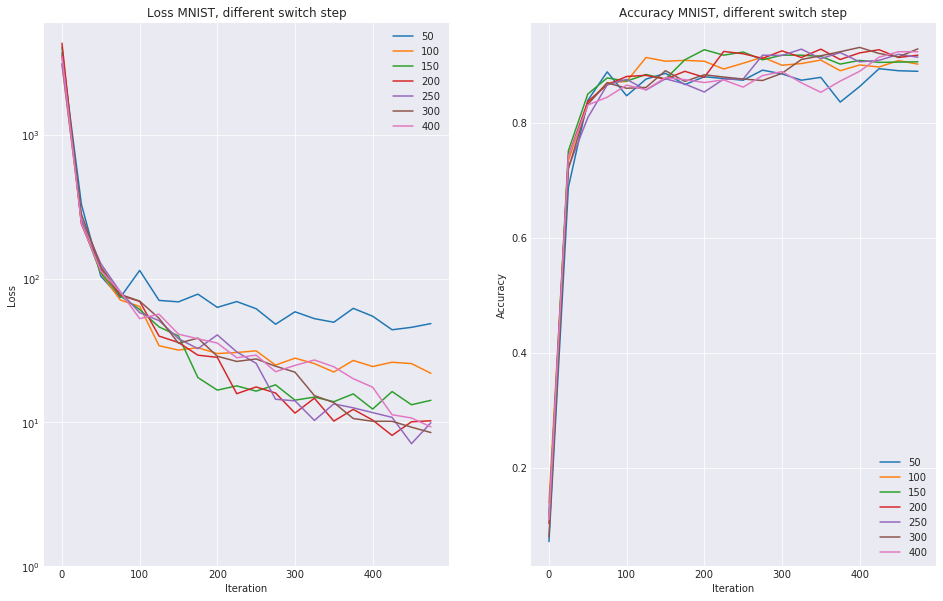

In [22]:
plt.figure(figsize=(16,10))
ar = np.arange(0, num_steps, 25)
for switch_step in [50, 100, 150, 200, 250, 300, 400]:
    Loss_GGT_SGD, Accur_GGT_SGD, _ = opt_test_MNIST([opt_GGT, opt_SGD], mnist, num_steps, batch_size=2000, switch_step=switch_step)
    plt.subplot(1,2,1)
    plt.plot(x_range[ar], Loss_GGT_SGD[ar])
    plt.subplot(1,2,2)
    plt.plot(x_range[ar], Accur_GGT_SGD[ar])
    
legends = ['50', '100', '150', '200', '250', '300', '400']
plt.subplot(1,2,1)
plt.title('Loss MNIST, different switch step')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend(legends)
plt.yscale('log')
plt.ylim(1, 6000)

plt.subplot(1,2,2)
plt.title('Accuracy MNIST, different switch step')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.legend(legends)

plt.show()

HBox(children=(IntProgress(value=0, max=501), HTML(value='')))

Optimization Finished!


HBox(children=(IntProgress(value=0, max=501), HTML(value='')))

Optimization Finished!


HBox(children=(IntProgress(value=0, max=501), HTML(value='')))

Optimization Finished!


HBox(children=(IntProgress(value=0, max=501), HTML(value='')))

Optimization Finished!


HBox(children=(IntProgress(value=0, max=501), HTML(value='')))

Optimization Finished!


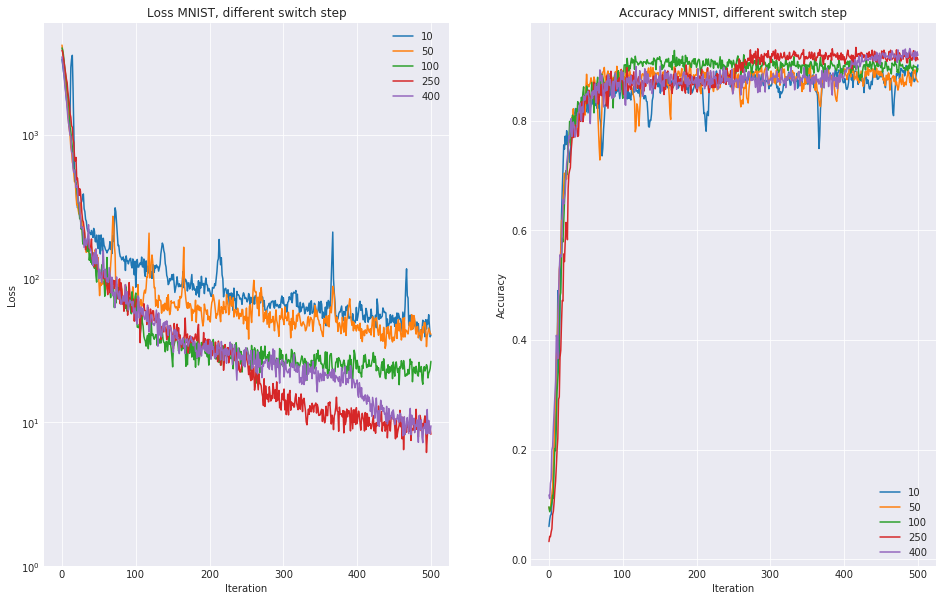

In [23]:
plt.figure(figsize=(16,10))

for switch_step in [10, 50, 100, 250, 400]:
    Loss_GGT_SGD, Accur_GGT_SGD, _ = opt_test_MNIST([opt_GGT, opt_SGD], mnist, num_steps, batch_size=2000, switch_step=switch_step)
    plt.subplot(1,2,1)
    plt.plot(x_range, Loss_GGT_SGD)
    plt.subplot(1,2,2)
    plt.plot(x_range, Accur_GGT_SGD)
    
plt.subplot(1,2,1)
plt.title('Loss MNIST, different switch step')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend(['10', '50', '100', '250', '400'])
plt.yscale('log')
plt.ylim(1, 6000)

plt.subplot(1,2,2)
plt.title('Accuracy MNIST, different switch step')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.legend(['10', '50', '100', '250', '400'])

plt.show()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


HBox(children=(IntProgress(value=0, max=501), HTML(value='')))

Optimization Finished!


HBox(children=(IntProgress(value=0, max=501), HTML(value='')))

Optimization Finished!


HBox(children=(IntProgress(value=0, max=501), HTML(value='')))

Optimization Finished!


HBox(children=(IntProgress(value=0, max=501), HTML(value='')))

Optimization Finished!


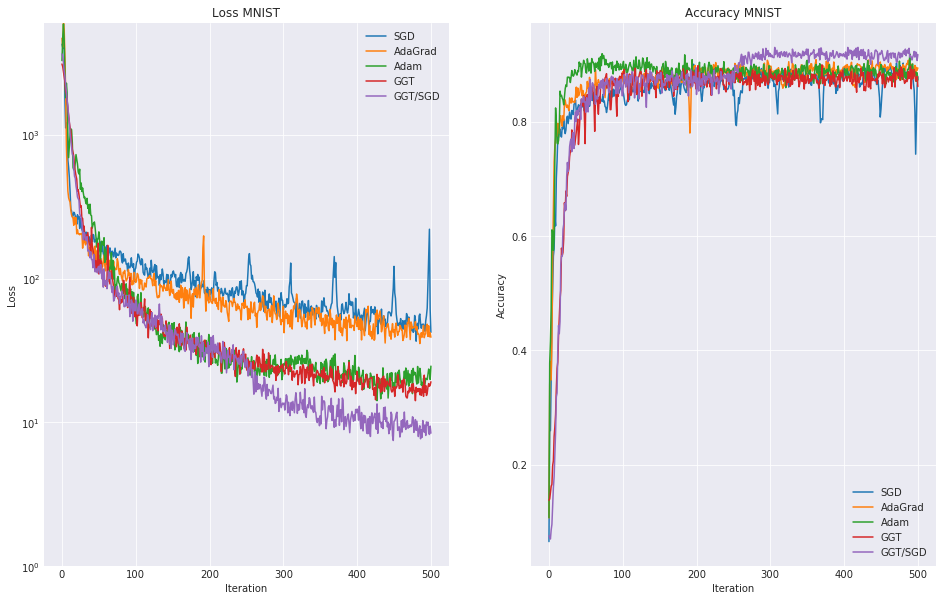

In [12]:
tf.logging.set_verbosity(tf.logging.ERROR)
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
    
learning_rate = 0.05
num_steps = 500
optimizers = [
              tf.train.GradientDescentOptimizer(learning_rate / 10),
              tf.train.AdagradOptimizer(learning_rate),
              tf.train.AdamOptimizer(learning_rate),
              tf.contrib.opt.GGTOptimizer(5 * learning_rate, window=20)
             ]

x_range = np.arange(0, num_steps)
plt.figure(figsize=(16,10))
    
for opt in optimizers:
    Loss, Accur, _ = opt_test_MNIST(opt, mnist, num_steps, batch_size=2000)
    plt.subplot(1,2,1)
    plt.plot(x_range, Loss)
    plt.subplot(1,2,2)
    plt.plot(x_range, Accur)
    
plt.subplot(1,2,1)
plt.plot(x_range, Loss_GGT_SGD)
plt.subplot(1,2,2)
plt.plot(x_range, Accur_GGT_SGD)
    
plt.subplot(1,2,1)
plt.title('Loss MNIST')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend(['SGD', 'AdaGrad', 'Adam',  'GGT', 'GGT/SGD'])
plt.yscale('log')
plt.ylim(1, 6000)

plt.subplot(1,2,2)
plt.title('Accuracy MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.legend(['SGD', 'AdaGrad', 'Adam',  'GGT', 'GGT/SGD'])

plt.show()

## Syntetic test ill-conditional Gaussion destribution

In [30]:
gen = np.random.rand(10)
np.random.shuffle(gen)
gen[-1] = np.max(gen[:-1]) / 100
G = np.diag(gen)**2
np.linalg.cond(G)

10000.000000000002

In [31]:
X = np.random.multivariate_normal(np.zeros(10), G, size=1500)
plane = np.random.randn(10)
y = np.empty((1500, 1))
y[:, 0] = (np.sign(X.dot(plane)) + 1) / 2

X_train, X_test = X[:1000], X[1000:]
y_train, y_test = y[:1000], y[1000:]

In [32]:
X_train.shape, y_train.shape, y_train.mean()

((1000, 10), (1000, 1), 0.495)

In [73]:
# hyperparameters
learning_rate = 0.1
display_step = 1

def Syntetic_test_1 (optimizers, num_epochs, switch_step=0):
    # tf Graph input
    X = tf.placeholder("float", [None, 10])
    y = tf.placeholder("float", [None, 1])

    W = tf.Variable(tf.zeros([10, 1]))
    # b is our bias. This will also update during training time
    b = tf.Variable(tf.zeros([1]))

    #function
    y_ = tf.matmul(X, W) + b
    #logistic regression loss
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_))
    if switch_step != 0:
        optimizer = optimizers[0].minimize(loss)
    else:
        optimizer = optimizers.minimize(loss)

    Loss = np.empty(num_epochs)
    timing = np.empty(num_epochs)
    
    with tf.Session() as sess:
        # initialize all variables
        sess.run(tf.global_variables_initializer())
        start = time()
        for epoch in tqdm_notebook(range(num_epochs)):
            cost_in_each_epoch = 0
            # let's start training
            if switch_step == epoch and switch_step != 0:
                optimizer = optimizers[1].minimize(loss)
            _, Loss[epoch] = sess.run([optimizer, loss], feed_dict={X: X_train, y: y_train})
            timing[epoch] = time() - start

    return Loss, timing

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

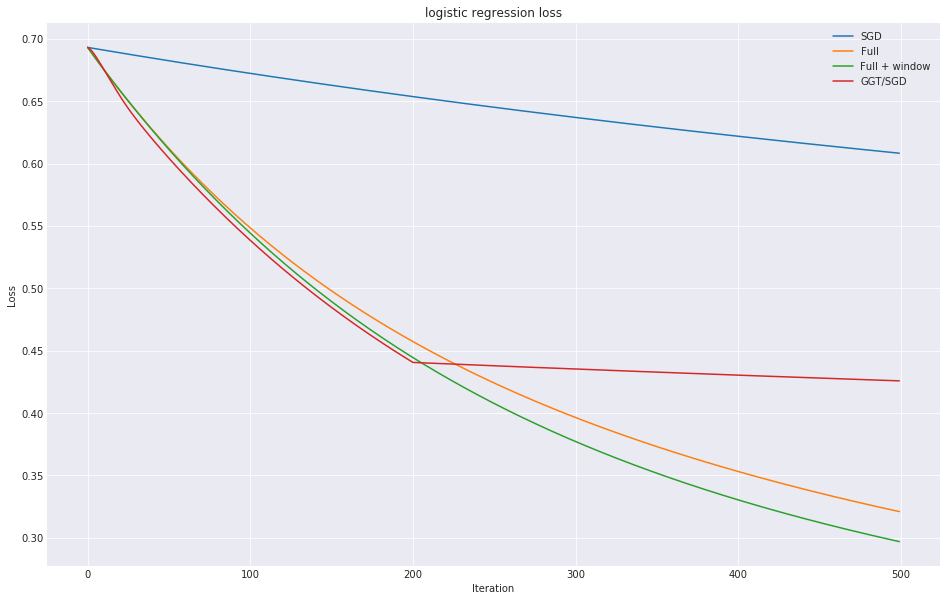

In [43]:
learning_rate = 0.05
num_epochs = 500
optimizers = [
              tf.train.GradientDescentOptimizer(learning_rate / 10),
              tf.contrib.opt.GGTOptimizer(learning_rate / 5, window=500, beta1=0.),
              tf.contrib.opt.GGTOptimizer(learning_rate / 5, window=20, beta1=0.)
             ]

opt_GGT = tf.contrib.opt.GGTOptimizer(learning_rate / 5, window=20)
opt_SGD = tf.train.GradientDescentOptimizer(learning_rate / 10)

x_range = np.arange(0, num_epochs+1)
plt.figure(figsize=(16,10))
    
for opt in optimizers:
    Loss, _ = Syntetic_test_1(opt, num_epochs)
    plt.plot(x_range[:-1], Loss[:-1])

Loss, _ = Syntetic_test_1([opt_GGT, opt_SGD], num_epochs, switch_step=200)
plt.plot(x_range[:-1], Loss[:-1])

plt.title('logistic regression loss')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend(['SGD', 'Full', 'Full + window', 'GGT/SGD'])

In [44]:
X = np.random.multivariate_normal(np.zeros(10), G, size=1500)
c = np.empty((1500, 1))
c[:, 0] = np.random.uniform(0, 1, 1500)

plane = np.random.randn(10)

X_train, X_test = X[:1000], X[1000:]
c_train, c_test = c[:1000], c[1000:]

In [53]:
import tensorflow as tf

# hyperparameters
learning_rate = 0.1
num_epochs = 500
display_step = 1

def Syntetic_test_2 (optimizers, num_epochs, switch_step=0):
    # tf Graph input
    X = tf.placeholder("float", [None, 10])
    c = tf.placeholder("float", [None, 1])

    W = tf.Variable(tf.zeros([10, 1]))
    # b is our bias. This will also update during training time

    #function
    y_ = -tf.log1p(tf.matmul(X, W) + c)
    #logistic regression loss
    loss = tf.reduce_mean(y_)
    if switch_step != 0:
        optimizer = optimizers[0].minimize(loss)
    else:
        optimizer = optimizers.minimize(loss)

    Loss = np.empty(num_epochs+1)

    with tf.Session() as sess:
        # initialize all variables
        sess.run(tf.global_variables_initializer())
        for epoch in tqdm_notebook(range(num_epochs)):
            cost_in_each_epoch = 0
            # let's start training
            if switch_step == epoch and switch_step != 0:
                optimizer = optimizers[1].minimize(loss)
            _, Loss[epoch] = sess.run([optimizer, loss], feed_dict={X: X_train, c: c_train})

    return (Loss)

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

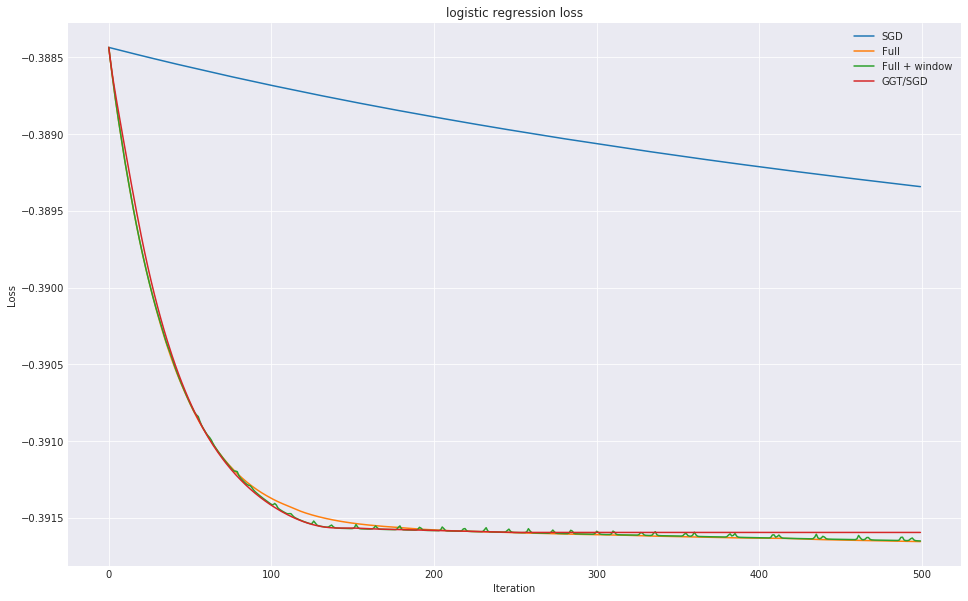

In [52]:
learning_rate = 0.05
optimizers = [
              tf.train.GradientDescentOptimizer(learning_rate / 10),
              tf.contrib.opt.GGTOptimizer(learning_rate / 5, window=500, beta1=0.),
              tf.contrib.opt.GGTOptimizer(learning_rate / 5, window=20, beta1=0.)
             ]

opt_GGT = tf.contrib.opt.GGTOptimizer(learning_rate / 5, window=20)
opt_SGD = tf.train.GradientDescentOptimizer(learning_rate / 10)

x_range = np.arange(0, num_epochs+1)
plt.figure(figsize=(16,10))
    
for opt in optimizers:
    Loss = Syntetic_test_2(opt, num_epochs)
    plt.plot(x_range[:-1], Loss[:-1])
    
Loss = Syntetic_test_2([opt_GGT, opt_SGD], num_epochs, switch_step=250)
plt.plot(x_range[:-1], Loss[:-1])

plt.title('logistic regression loss')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend(['SGD', 'Full', 'Full + window', 'GGT/SGD'])

In [ ]:
opt_GGT = tf.contrib.opt.GGTOptimizer(learning_rate / 5, window=20)
opt_SGD = tf.train.GradientDescentOptimizer(learning_rate / 10)

learning_rate = 0.05
num_steps = 500

plt.figure(figsize=(16,10))

Loss, _, timing = opt_test_MNIST(opt_GGT, mnist, num_steps, batch_size=2000)
plt.plot(timing, Loss)
print (timing)
Loss, _, timing = opt_test_MNIST(opt_SGD, mnist, num_steps, batch_size=2000)
plt.plot(timing, Loss)
print (timing)
Loss, _, timing = opt_test_MNIST([opt_GGT, opt_SGD], mnist, num_steps, batch_size=2000, switch_step=250)
plt.plot(timing, Loss)
print (timing)

plt.title('Timing MNIST')
plt.ylabel('Loss')
plt.xlabel('Time')
plt.legend(['GGT', 'SGD', 'GGT/SGD'])
plt.yscale('log')
plt.ylim(1, 6000)

plt.show()

In [81]:
def opt_test_MNIST (optimizers, 
                    data,
                    time_left,
                    batch_size = 128,
                    display_step = 100, switch_step=0):
    # Network Parameters
    n_hidden_1 = 256 # 1st layer number of neurons
    n_hidden_2 = 256 # 2nd layer number of neurons
    num_input = 784 # MNIST data input (img shape: 28*28)
    num_classes = 10 # MNIST total classes (0-9 digits)

    # tf Graph input
    X = tf.placeholder("float", [None, num_input])
    Y = tf.placeholder("float", [None, num_classes])

    # Store layers weight & bias
    weights = {
        'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
        'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
        'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'b2': tf.Variable(tf.random_normal([n_hidden_2])),
        'out': tf.Variable(tf.random_normal([num_classes]))
    }


    # Create model
    def neural_net(x):
        # Hidden fully connected layer with 256 neurons
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        # Hidden fully connected layer with 256 neurons
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        # Output fully connected layer with a neuron for each class
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
        return out_layer

    # Construct model
    logits = neural_net(X)
    prediction = tf.nn.softmax(logits)

    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=Y))
    #optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    #optimizer = tf.contrib.opt.GGTOptimizer(learning_rate=learning_rate)
    if switch_step != 0:
        optimizer = optimizers[0]
    else:
        optimizer = optimizers
    train_op = optimizer.minimize(loss_op)

    # Evaluate model
    correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()
    
    #Return parameters
    Loss = []
    Accur = []
    timing = []
    
    #Start training
    
    with tf.Session() as sess:

        # Run the initializer
        sess.run(init)
        start = time()
        step = 0
        while time() - start < time_left:
            step += 1
            batch_x, batch_y = data.train.next_batch(batch_size)
            # Run optimization op (backprop)
            
            if switch_step == step and switch_step != 0:
                train_op = optimizers[1].minimize(loss_op)
            
            L, A, _ = sess.run([loss_op, accuracy, train_op],
                                                  feed_dict={X: batch_x, Y: batch_y})
            Loss.append(L)
            Accur.append(A)
            timing.append(time() - start)
            
        print("Optimization Finished!")
        return Loss, Accur, timing

Optimization Finished!
Optimization Finished!
Optimization Finished!


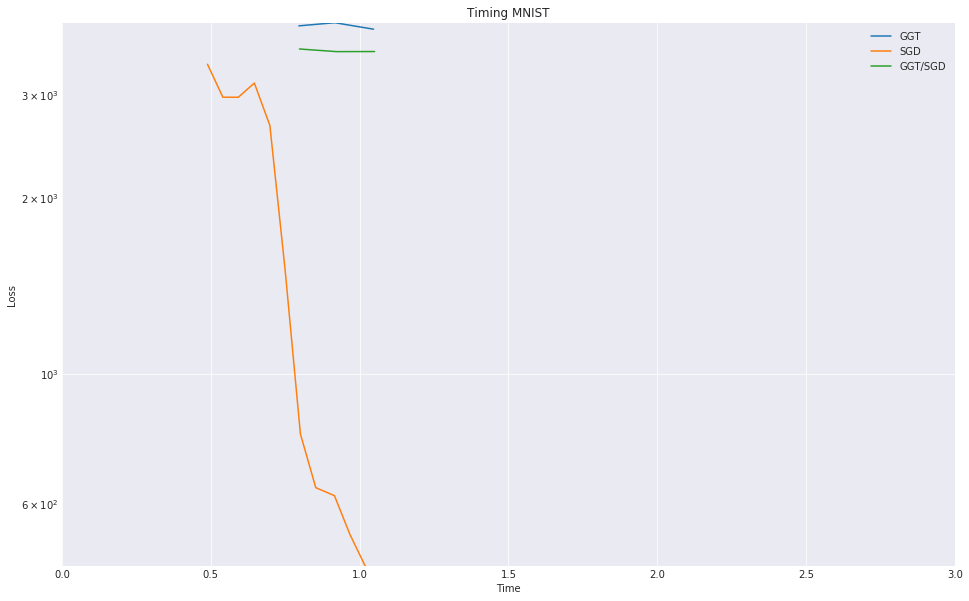

In [87]:
max_y = 0.0

plt.figure(figsize=(16,10))

Loss, _, timing = opt_test_MNIST(opt_GGT, mnist, 1, batch_size=2000)
plt.plot(timing, Loss)
max_y = np.max([np.max(Loss), max_y])

Loss, _, timing = opt_test_MNIST(opt_SGD, mnist, 1, batch_size=2000)
plt.plot(timing, Loss)
max_y = np.max([np.max(Loss), max_y])

Loss, _, timing = opt_test_MNIST([opt_GGT, opt_SGD], mnist, 1, batch_size=2000, switch_step=250)
plt.plot(timing, Loss)
max_y = np.max([np.max(Loss), max_y])

plt.title('Timing MNIST')
plt.ylabel('Loss')
plt.xlabel('Time')
plt.legend(['GGT', 'SGD', 'GGT/SGD'])
plt.yscale('log')
plt.xlim(0, 3)
plt.ylim(0, max_y)

plt.show()

In [65]:
gen = np.random.rand(10)
np.random.shuffle(gen)
gen[-1] = np.max(gen[:-1]) / 100
G = np.diag(gen)**2
np.linalg.cond(G)

X = np.random.multivariate_normal(np.zeros(10), G, size=1500)
plane = np.random.randn(10)
y = np.empty((1500, 1))
y[:, 0] = (np.sign(X.dot(plane)) + 1) / 2

X_train, X_test = X[:1000], X[1000:]
y_train, y_test = y[:1000], y[1000:]

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

[  0.63253355   0.72628951   0.81032133   0.90465951   0.99031115
   1.09463215   1.19222689   1.27668428   1.37530994   1.45590663
   1.55856872   1.65738702   1.73838806   1.82503271   1.90795851
   2.00498128   2.08806634   2.18607092   2.27196169   2.37315154
   2.45907998   2.55646205   2.63535738   2.73516941   2.81435347
   2.89994931   2.962883     3.03528333   3.09818268   3.17666411
   3.23904181   3.3123827    3.37605715   3.45046329   3.51452589
   3.58896351   3.65624142   3.73003244   3.79434705   3.86724138
   3.93207145   4.00892377   4.07577443   4.15363741   4.21793151
   4.29462075   4.35965371   4.43601608   4.50147629   4.57884622
   4.64245701   4.72001433   4.78225327   4.8585608    4.92268586
   4.99971247   5.06304789   5.13590145   5.20007896   5.27822351
   5.34104991   5.41934729   5.48315096   5.55671      5.62239742
   5.69940424   5.76347733   5.84437871   5.90819359   5.98258233
   6.04603529   6.12646103   6.19248128   6.27548552   6.34300351
   6.41961

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

[ 0.40829587  0.41205764  0.41338968  0.41784     0.41889119  0.41978168
  0.42052031  0.42124438  0.4220376   0.42284727  0.42368937  0.424438
  0.42514873  0.42595816  0.42678547  0.42741919  0.42806697  0.42869186
  0.42934871  0.43008184  0.43088245  0.43195295  0.43294287  0.43391967
  0.43486738  0.43575573  0.43663216  0.43775535  0.4387238   0.43968201
  0.44066596  0.44158506  0.44262409  0.44342208  0.44408727  0.44476795
  0.44539762  0.4460485   0.44672179  0.44738746  0.44821787  0.44885683
  0.44950056  0.45016551  0.45080495  0.45144391  0.45209956  0.45273089
  0.45337415  0.4540267   0.45466423  0.45532799  0.45596313  0.4566102
  0.45722461  0.45783806  0.45847511  0.45911384  0.45974636  0.46039486
  0.46101785  0.46168113  0.46230984  0.46292615  0.46366429  0.46431112
  0.46495771  0.46558666  0.46625996  0.4668932   0.46754074  0.46818352
  0.46880364  0.46941257  0.47010207  0.47072244  0.47135115  0.47200966
  0.47264433  0.47328305  0.47394466  0.47456074  0.47

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

[  0.53169703   0.62265563   0.70266747   0.77851605   0.84255242
   0.91537309   0.97932315   1.04960918   1.11423397   1.19087338
   1.25657678   1.33201694   1.39694905   1.47041106   1.54519296
   1.6400764    1.71460223   1.79160333   1.85595345   1.92469001
   1.98902082   2.06468749   2.12854362   2.20836949   2.27096629
   2.3456676    2.410285     2.4862144    2.54886866   2.62125206
   2.68470693   2.75789809   2.82365561   2.89524817   2.95951676
   3.0328095    3.09702063   3.17287588   3.23850679   3.30926418
   3.37536669   3.46764469   3.54691768   3.62415552   3.68600941
   3.75863624   3.82161355   3.89835882   3.96847272   4.06042552
   4.13865924   4.22112322   4.28860569   4.35937619   4.42301106
   4.49834466   4.56739354   4.64734101   4.71315646   4.78557444
   4.85075879   4.92599106   4.98856163   5.06278777   5.12636733
   5.20024657   5.26325655   5.34013128   5.40322924   5.47612166
   5.54491663   5.61909413   5.68286443   5.75809598   5.82154894
   5.89491

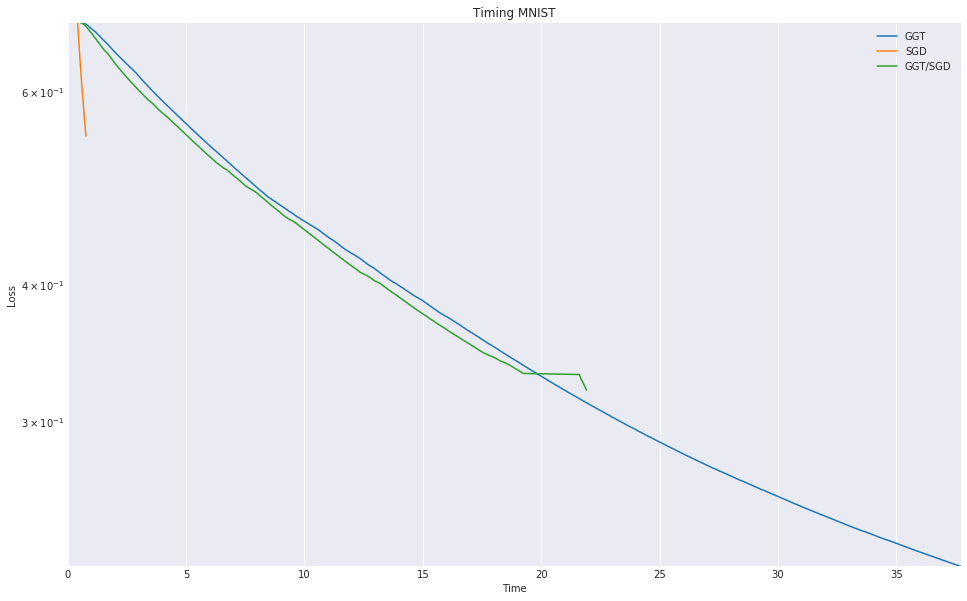

In [74]:
num_epochs = 500
max_time = 0.0
max_y = 0.0

plt.figure(figsize=(16,10))

Loss, timing = Syntetic_test_1(opt_GGT, num_epochs)
plt.plot(timing, Loss)
max_time = np.max([np.max(timing), max_time])
max_y = np.max([np.max(Loss), max_y])
#print (timing)
Loss, timing = Syntetic_test_1(opt_SGD, num_epochs)
plt.plot(timing, Loss)
max_time = np.max([np.max(timing), max_time])
max_y = np.max([np.max(Loss), max_y])
#print (timing)
Loss, timing = Syntetic_test_1([opt_GGT, opt_SGD], num_epochs, switch_step=250)
plt.plot(timing, Loss)
max_time = np.max([np.max(timing), max_time])
max_y = np.max([np.max(Loss), max_y])
#print (timing)

plt.title('Timing MNIST')
plt.ylabel('Loss')
plt.xlabel('Time')
plt.legend(['GGT', 'SGD', 'GGT/SGD'])
plt.yscale('log')
plt.xlim(0, max_time)
plt.ylim(0, max_y)

plt.show()

In [76]:
# hyperparameters
learning_rate = 0.1
display_step = 1

def Syntetic_test_1 (optimizers, time_left, switch_step=0):
    # tf Graph input
    X = tf.placeholder("float", [None, 10])
    y = tf.placeholder("float", [None, 1])

    W = tf.Variable(tf.zeros([10, 1]))
    # b is our bias. This will also update during training time
    b = tf.Variable(tf.zeros([1]))

    #function
    y_ = tf.matmul(X, W) + b
    #logistic regression loss
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_))
    if switch_step != 0:
        optimizer = optimizers[0].minimize(loss)
    else:
        optimizer = optimizers.minimize(loss)

    Loss = []
    timing = []
    
    with tf.Session() as sess:
        # initialize all variables
        sess.run(tf.global_variables_initializer())
        start = time()
        epoch = 0
        
        while time() - start < time_left:
            epoch += 1
            cost_in_each_epoch = 0
            # let's start training
            if switch_step == epoch and switch_step != 0:
                optimizer = optimizers[1].minimize(loss)
            _, L= sess.run([optimizer, loss], feed_dict={X: X_train, y: y_train})
            Loss.append(L)
            timing.append(time() - start)
            
    return np.array(Loss), np.array(timing)

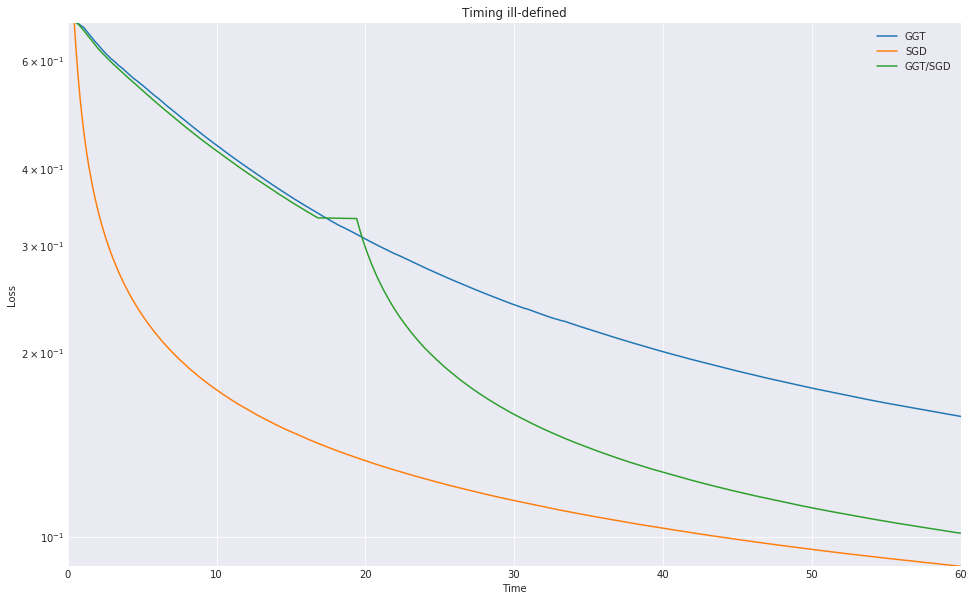

In [88]:
num_epochs = 500
max_y = 0.0

plt.figure(figsize=(16,10))

Loss, timing = Syntetic_test_1(opt_GGT, 60)
plt.plot(timing, Loss)
max_y = np.max([np.max(Loss), max_y])
#print (timing)
Loss, timing = Syntetic_test_1(opt_SGD, 60)
plt.plot(timing, Loss)
max_y = np.max([np.max(Loss), max_y])
#print (timing)
Loss, timing = Syntetic_test_1([opt_GGT, opt_SGD], 60, switch_step=250)
plt.plot(timing, Loss)
max_y = np.max([np.max(Loss), max_y])
#print (timing)

plt.title('Timing ill-defined')
plt.ylabel('Loss')
plt.xlabel('Time')
plt.legend(['GGT', 'SGD', 'GGT/SGD'])
plt.yscale('log')
plt.xlim(0, 60)
plt.ylim(0, max_y)

plt.show()

Didn't use the below part

In [143]:
def opt_test_MNIST (optimizers, 
                    data,
                    num_steps,
                    batch_size = 128,
                    display_step = 100, switch_step=0):
    # Network Parameters
    n_hidden_1 = 256 # 1st layer number of neurons
    n_hidden_2 = 256 # 2nd layer number of neurons
    num_input = 784 # MNIST data input (img shape: 28*28)
    num_classes = 10 # MNIST total classes (0-9 digits)

    # tf Graph input
    X = tf.placeholder("float", [None, num_input])
    Y = tf.placeholder("float", [None, num_classes])

    # Store layers weight & bias
    weights = {
        'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
        'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
        'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'b2': tf.Variable(tf.random_normal([n_hidden_2])),
        'out': tf.Variable(tf.random_normal([num_classes]))
    }


    # Create model
    def neural_net(x):
        # Hidden fully connected layer with 256 neurons
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        # Hidden fully connected layer with 256 neurons
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        # Output fully connected layer with a neuron for each class
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
        return out_layer

    # Construct model
    logits = neural_net(X)
    prediction = tf.nn.softmax(logits)

    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=Y))
    #optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    #optimizer = tf.contrib.opt.GGTOptimizer(learning_rate=learning_rate)
    if switch_step != 0:
        optimizer = optimizers[0]
    else:
        optimizer = optimizers
    train_op = optimizer.minimize(loss_op)

    # Evaluate model
    correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()
    
    #Return parameters
    Loss = []
    Accur = []
    timing = []
    
    #Start training
    
    with tf.Session() as sess:

        # Run the initializer
        sess.run(init)
        step = 0
        for step in tqdm_notebook(range(num_steps)):
            step += 1
            batch_x, batch_y = data.train.next_batch(batch_size)
            # Run optimization op (backprop)
            
            if switch_step == step and switch_step != 0:
                train_op = optimizers[1].minimize(loss_op)
                grads_and_vars = optimizers[1].compute_gradients(loss_op)
            
            L, A, _ = sess.run([loss_op, accuracy, train_op],
                                                  feed_dict={X: batch_x, Y: batch_y})
            if step < switch_step:
                if switch_step != 0:
                    grads_and_vars = optimizer.compute_gradients(loss_op)
                else:
                    grads_and_vars = optimizers.compute_gradients(loss_op)
            grad_norms = tf.add_n([tf.nn.l2_loss(g) for g, v in grads_and_vars if g is not None])
            gn = sess.run([grad_norms], feed_dict={X: batch_x, Y: batch_y})
            print (gn)
            Loss.append(L)
            Accur.append(A)
            
        print("Optimization Finished!")
        return Loss, Accur, timing